In [1]:
import sys 
sys.path.insert(0, "../BrainSpace/")

import matplotlib.pyplot as plt

import nibabel as nib
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
import nilearn.plotting as plotting

from brainspace.gradient import GradientMaps

%matplotlib inline

In [11]:
dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_filename = dataset.maps
labels = dataset.labels

print('Atlas ROIs are located in nifti image (4D) at: %s' %
      atlas_filename)  # 4D data

# One subject of brain development fmri data
n=20
data = datasets.fetch_development_fmri(n_subjects=n)
fmri_filenames = data.func[0:n]

Atlas ROIs are located in nifti image (4D) at: /Users/liza/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz


Downloaded 69170 of 69170 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 5875966 of 5875966 bytes (100.0%,    0.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 68464 of 68464 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 5845425 of 5845425 bytes (100.0%,    0.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 68425 of 68425 bytes (100.0%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 7361169 of 7361169 bytes (100.0%,    0.0s remaining) ...done. (5 seconds, 0 min)


Downloaded 68894 of 68894 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 6586819 of 6586819 bytes (100.0%,    0.0s remaining) ...done. (6 seconds, 0 min)


Downloaded 68848 of 68848 bytes (100.0%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 6111716 of 6111716 bytes (100.0%,    0.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 68243 of 68243 bytes (100.0%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 6067448 of 6067448 bytes (100.0%,    0.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 69265 of 69265 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 6122113 of 6122113 bytes (100.0%,    0.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 68479 of 68479 bytes (100.0%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 6295931 of 6295931 bytes (100.0%,    0.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 68301 of 68301 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 6384587 of 6384587 bytes (100.0%,    0.0s remaining) ...done. (4 seconds, 0 min)


Downloaded 67912 of 67912 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 5934622 of 5934622 bytes (100.0%,    0.0s remaining) ...done. (3 seconds, 0 min)


In [12]:
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True,
                           memory='nilearn_cache', verbose=5)

# Here we go from nifti files to the signal time series in a numpy
# array. Note how we give confounds to be regressed out during signal
# extraction
# for i, ts in enumerate(fmri_filenames): 
#     time_series = masker.fit_transform(bold_files[i], confounds=confound_files[i])
#     time_series_dict[sub_ses] = time_series
# time_series = masker.fit_transform(fmri_filenames, confounds=data.confounds)

correlations = []
connectome_measure = ConnectivityMeasure(kind='correlation')
for i, filename in enumerate(fmri_filenames):
    timeseries = masker.fit_transform(fmri_filenames[i], confounds=data.confounds[i])
    # call fit_transform from ConnectivityMeasure object
    correlation = connectome_measure.fit_transform([timeseries])[0]
    # saving each subject correlation to correlations
    correlations.append(correlation)

# Mean of all correlations
import numpy as np
correlation_matrix = np.mean(correlations, axis=0)

[NiftiLabelsMasker.fit_transform] loading data from /Users/liza/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
Resampling labels
[Memory]0.0s, 0.0min    : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from /Users/liza/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
[Memory]0.4s, 0.0min    : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from /Users/liza/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/Users/liza/nilearn_data/development_fmri/development_fmri/sub-pixar125_task-pixa

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 0.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from /Users/liza/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/Users/liza/nilearn_data/development_fmri/development_fmri/sub-pixar011_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/Users/liza/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  'strategy': 'mean',
  't_r': 

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 0.7s, 0.0min


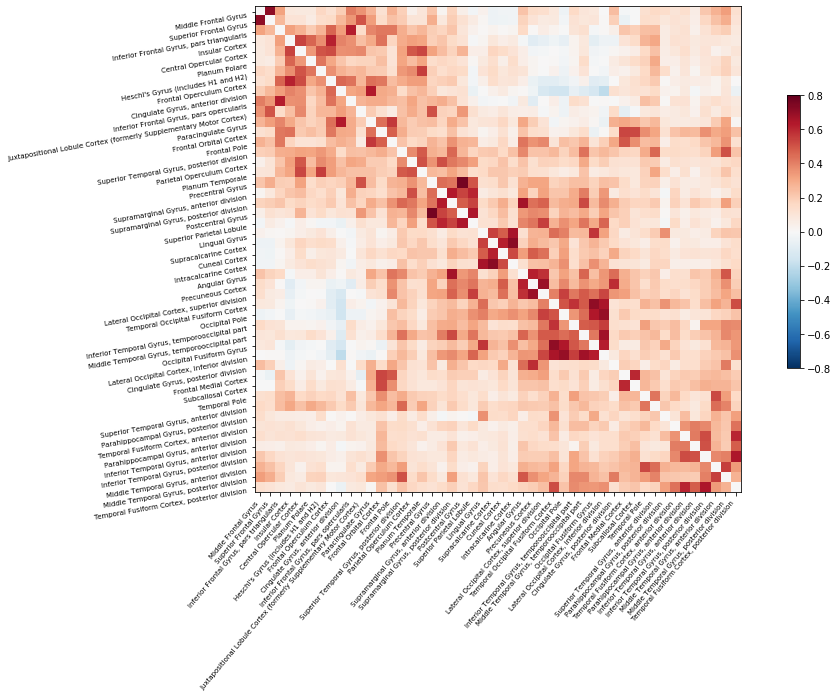

In [13]:
# Plot the correlation matrix
import numpy as np
from nilearn import plotting
# Mask the main diagonal for visualization:
np.fill_diagonal(correlation_matrix, 0)
# The labels we have start with the background (0)
plotting.plot_matrix(correlation_matrix, figure=(10, 10), labels=labels[1:],
                     vmax=0.8, vmin=-0.8, reorder=True)

# Visualize the atlas

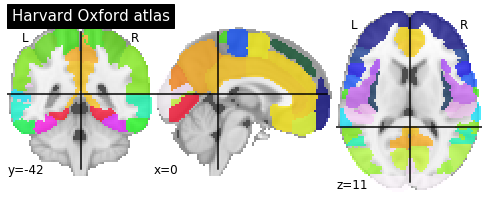

In [14]:
atlas = nib.load(atlas_filename)
plotting.plot_roi(atlas, title="Harvard Oxford atlas")

# Extract the gradients (2 components)

In [15]:
gm = GradientMaps(n_components=2, random_state=0)
gm.fit(correlation_matrix)

../BrainSpace/brainspace/gradient/embedding.py:70: UserWarning: Affinity is not symmetric. Making symmetric.
  warnings.warn('Affinity is not symmetric. Making symmetric.')


GradientMaps(alignment=None, approach='dm', kernel=None, n_components=2,
             random_state=0)

In [22]:
# Create new stat images
atlas_data = atlas.get_fdata()
g1 = np.zeros_like(atlas_data)
g2 = np.zeros_like(atlas_data)
for i, g in enumerate([g1, g2]):
    for j in range(0, len(labels[1:])): 
        g[atlas_data==(j+1)] = gm.gradients_.T[i][j]
    
g1_img = nib.Nifti1Image(g1, atlas.affine, atlas.header)
g2_img = nib.Nifti1Image(g2, atlas.affine, atlas.header)


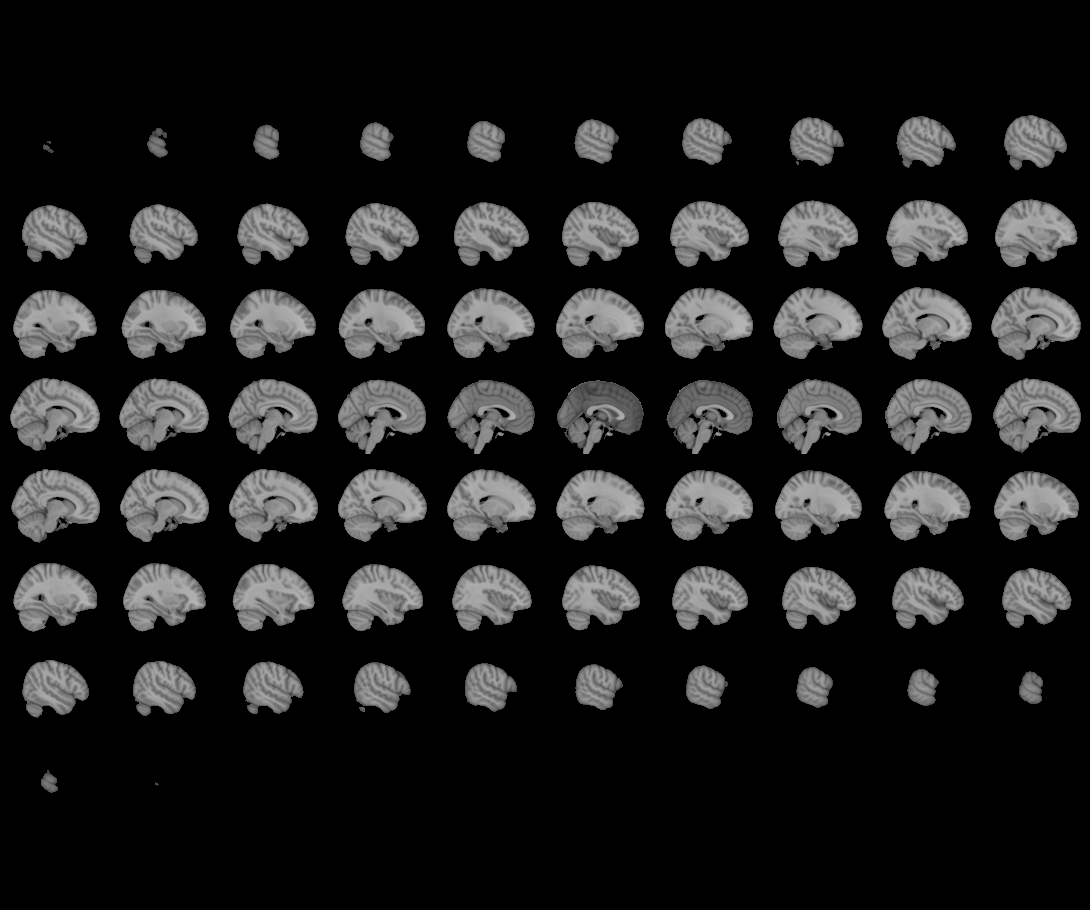
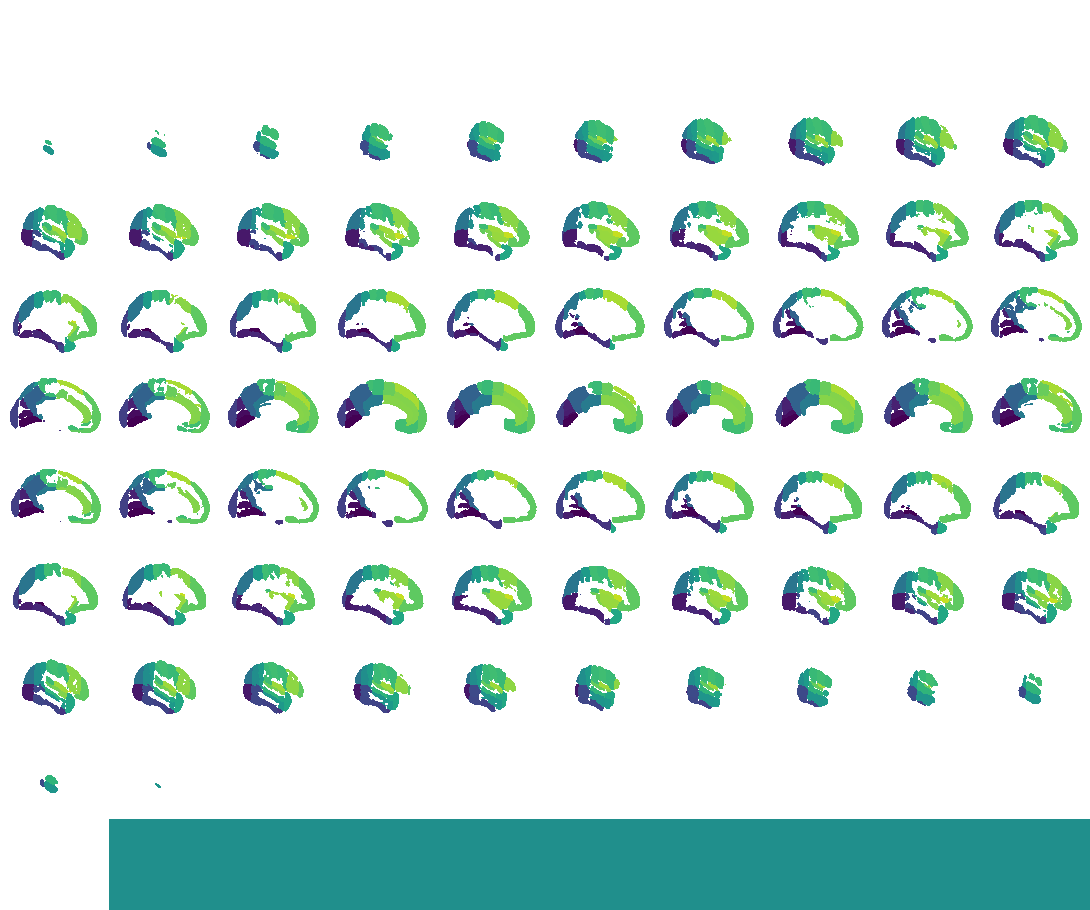

In [23]:
plotting.view_img(g1_img, colorbar=True, draw_cross=False, cmap="viridis_r")

# Create one figure with the two gradients as subplots 

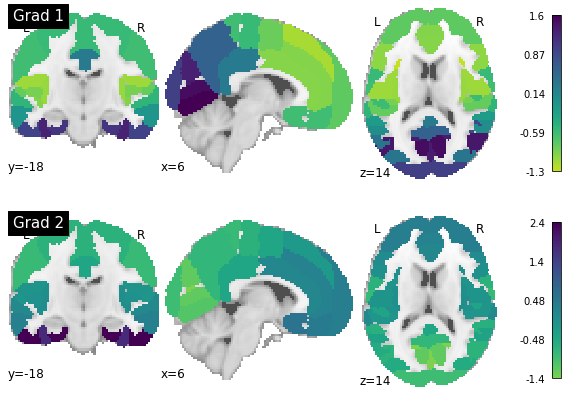

In [35]:
img_slice = [6, -18, 14]

fig = plt.figure(figsize=(10,7))
ax1 = plt.subplot(2, 1, 1)
plotting.plot_stat_map(g1_img, colorbar=True, draw_cross=False, cut_coords=img_slice, cmap="viridis_r", axes=ax1, title="Grad 1", symmetric_cbar=False)
ax2 = plt.subplot(2, 1, 2)
plotting.plot_stat_map(g2_img, colorbar=True, draw_cross=False, cut_coords=img_slice, cmap="viridis_r", axes=ax2, title="Grad 2", symmetric_cbar=False)